#Libreries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
import keras
from keras.models import Sequential
from keras.layers import Dense , BatchNormalization
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import SGD

#Load DataSet and Preprocessing

In [3]:
df = pd.read_csv('dataset path')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#check missing values
miss = df.isna().sum()
print(miss)
#print sum number of null values
print("nan values: "+ str(df.isna().sum().sum()))

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
nan values: 0


In [7]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

X = StandardScaler().fit_transform(X)
y = LabelBinarizer().fit_transform(y)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#1

In [9]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(4,)),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [10]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model1.fit(x_train, y_train, validation_split=0.1 , epochs= 100, batch_size=128)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 1.0978 - accuracy: 0.3333 - val_loss: 1.0930 - val_accuracy: 0.4167
Epoch 2/100
1/1 [==============================] - 0s 123ms/step - loss: 1.0878 - accuracy: 0.3333 - val_loss: 1.0850 - val_accuracy: 0.4167
Epoch 3/100
1/1 [==============================] - 0s 87ms/step - loss: 1.0714 - accuracy: 0.3333 - val_loss: 1.0748 - val_accuracy: 0.5833
Epoch 4/100
1/1 [==============================] - 0s 79ms/step - loss: 1.0542 - accuracy: 0.6759 - val_loss: 1.0627 - val_accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 97ms/step - loss: 1.0343 - accuracy: 0.8796 - val_loss: 1.0473 - val_accuracy: 0.9167
Epoch 6/100
1/1 [==============================] - 0s 210ms/step - loss: 1.0116 - accuracy: 0.9167 - val_loss: 1.0289 - val_accuracy: 0.9167
Epoch 7/100
1/1 [==============================] - 0s 135ms/step - loss: 0.9839 - accuracy: 0.8704 - val_loss: 1.0058 - val_accuracy: 0.8333
Epoch 8/100
1/1 [==

In [11]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8

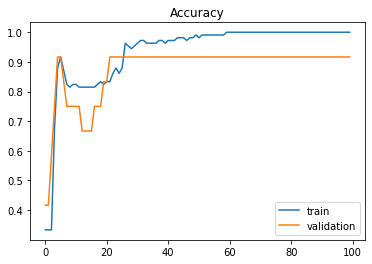

In [12]:
plt.plot(model1.history.history['accuracy'])
plt.plot(model1.history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(['train', 'validation'])
plt.show()

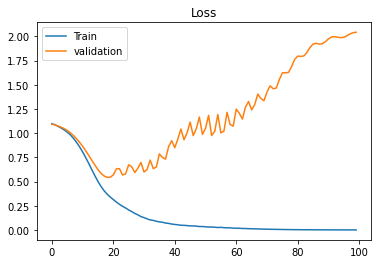

In [13]:
plt.plot(model1.history.history['loss'])
plt.plot(model1.history.history['val_loss'])
plt.title("Loss")
plt.legend(['Train','validation'])
plt.show()

In [14]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test accuracy: ", test_acc)

test_predictions = model1.predict(x_test)

1/1 [==============================] - 0s 47ms/step - loss: 0.0556 - accuracy: 0.9667
Test accuracy:  0.9666666388511658
1/1 [==============================] - 0s 304ms/step


#2

In [15]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(4,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [16]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model2.fit(x_train, y_train, validation_split=0.2 , epochs= 100, batch_size= 128)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.0942 - accuracy: 0.4167 - val_loss: 1.0804 - val_accuracy: 0.2500
Epoch 2/100
1/1 [==============================] - 0s 47ms/step - loss: 1.0730 - accuracy: 0.4375 - val_loss: 1.0719 - val_accuracy: 0.2083
Epoch 3/100
1/1 [==============================] - 0s 44ms/step - loss: 1.0532 - accuracy: 0.3854 - val_loss: 1.0610 - val_accuracy: 0.2083
Epoch 4/100
1/1 [==============================] - 0s 50ms/step - loss: 1.0311 - accuracy: 0.3854 - val_loss: 1.0466 - val_accuracy: 0.2917
Epoch 5/100
1/1 [==============================] - 0s 47ms/step - loss: 1.0032 - accuracy: 0.4062 - val_loss: 1.0297 - val_accuracy: 0.3333
Epoch 6/100
1/1 [==============================] - 0s 41ms/step - loss: 0.9860 - accuracy: 0.3958 - val_loss: 1.0102 - val_accuracy: 0.3750
Epoch 7/100
1/1 [==============================] - 0s 61ms/step - loss: 0.9559 - accuracy: 0.4271 - val_loss: 0.9875 - val_accuracy: 0.4167
Epoch 8/100
1/1 [=====

In [17]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                80        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 32)                544       
                                                                 
 dense_12 (Dense)            (None, 64)                2112      
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 256)              

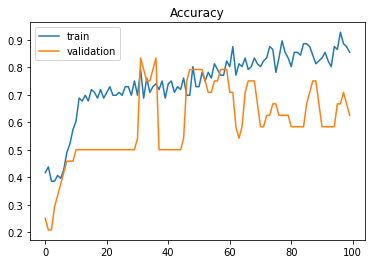

In [18]:
plt.plot(model2.history.history['accuracy'])
plt.plot(model2.history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(['train', 'validation'])
plt.show()

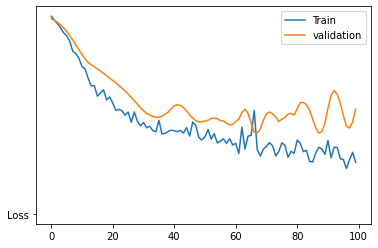

In [19]:
plt.plot(model2.history.history['loss'])
plt.plot(model2.history.history['val_loss'])
plt.plot('Loss')
plt.legend(['Train','validation'])
plt.show()

In [20]:
test_loss, test_acc = model2.evaluate(x_test, y_test)
print("Test accuracy: ", test_acc)

test_predictions = model2.predict(x_test)

1/1 [==============================] - 0s 41ms/step - loss: 0.3210 - accuracy: 0.8000
Test accuracy:  0.800000011920929
1/1 [==============================] - 0s 161ms/step


#3

In [21]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(4,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [22]:
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model3.fit(x_train, y_train, validation_split=0.2 , epochs= 100, batch_size= 128)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 1.7711 - accuracy: 0.3438 - val_loss: 1.0770 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 43ms/step - loss: 1.4834 - accuracy: 0.3854 - val_loss: 1.0716 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 43ms/step - loss: 1.4078 - accuracy: 0.4271 - val_loss: 1.0668 - val_accuracy: 0.6667
Epoch 4/100
1/1 [==============================] - 0s 60ms/step - loss: 1.2509 - accuracy: 0.4479 - val_loss: 1.0604 - val_accuracy: 0.6667
Epoch 5/100
1/1 [==============================] - 0s 47ms/step - loss: 1.2777 - accuracy: 0.4792 - val_loss: 1.0547 - val_accuracy: 0.6667
Epoch 6/100
1/1 [==============================] - 0s 60ms/step - loss: 1.1756 - accuracy: 0.5208 - val_loss: 1.0507 - val_accuracy: 0.6667
Epoch 7/100
1/1 [==============================] - 0s 49ms/step - loss: 1.0548 - accuracy: 0.5000 - val_loss: 1.0471 - val_accuracy: 0.5833
Epoch 8/100
1/1 [=====

In [23]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                80        
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_21 (Dense)            (None, 32)                544       
                                                                 
 dense_22 (Dense)            (None, 64)                2112      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                      

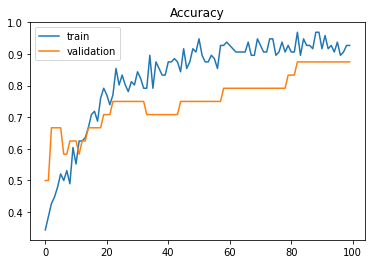

In [24]:
plt.plot(model3.history.history['accuracy'])
plt.plot(model3.history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(['train', 'validation'])
plt.show()

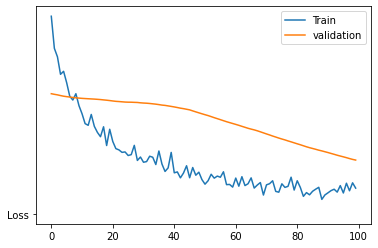

In [25]:
plt.plot(model3.history.history['loss'])
plt.plot(model3.history.history['val_loss'])
plt.plot('Loss')
plt.legend(['Train','validation'])
plt.show()

In [26]:
test_loss, test_acc = model3.evaluate(x_test, y_test)
print("Test accuracy: ", test_acc)

test_predictions = model3.predict(x_test)

1/1 [==============================] - 0s 28ms/step - loss: 0.3320 - accuracy: 0.9333
Test accuracy:  0.9333333373069763
1/1 [==============================] - 0s 169ms/step
